<a href="https://colab.research.google.com/github/NairaAhmedAI/-Social-Media-Analysis-Sentiment./blob/main/Project_DS_H_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

📝 1. Preparation and Setup

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

load to data

In [247]:
df=pd.read_csv("/content/sentimentdataset (1).csv")

Explore the data

In [248]:
df.sample(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
448,449,453,"In the wasteland of lost trust, the echoes of ...",Betrayal,2016-12-12 10:00:00,TrustWasteland,Facebook,#Betrayal #ReverberatingPromises,25.0,50.0,Italy,2016,12,12,10
389,390,394,Awe-inspired by the grandeur of an ancient cat...,Awe,2018-08-18 14:45:00,CathedralVisitor,Facebook,#Awe #ArchitecturalGrandeur,18.0,35.0,Czech Republic,2018,8,18,14
41,42,43,Celebrating a friend's birthday tonight! 🎂 ...,Positive,2023-01-28 19:30:00,BirthdayBash,Facebook,#Birthday #Celebration,15.0,30.0,UK,2023,1,28,19
578,579,583,"As the waves crash against the shore, the surf...",Ocean's Freedom,2021-07-20 18:15:00,SurfingEnthusiastWaveRider,Facebook,#OceansFreedom #SurfingThrills,22.0,45.0,Brazil,2021,7,20,18
399,400,404,Harmony resonates as musicians play a symphony...,Harmony,2019-11-30 19:30:00,MusicHarmonist,Instagram,#Harmony #MusicalUnity,35.0,70.0,Sweden,2019,11,30,19
164,165,167,"Overwhelmed by grief, missing a loved one dea...",Grief,2022-07-05 15:45:00,MourningHeart,Instagram,#Grief #Loss,8.0,15.0,Canada,2022,7,5,15
645,646,650,Started a photography club at school. Capturin...,Joy,2023-08-04 16:30:00,PhotoClubHighSchool,Instagram,#PhotographyClub #HighSchoolPhotographer,22.0,45.0,USA,2023,8,4,16
624,625,629,"Started a community garden, growing not just p...",Joy,2023-07-03 12:45:00,GreenThumbSenior,Twitter,#GardenFriends #SeniorGreenThumb,28.0,55.0,Canada,2023,7,3,12
204,205,207,"Facing challenges head-on, a determination th...",Determination,2020-09-18 13:45:00,ResilientSpirit,Facebook,#Determination #AchieveTheImpossible,10.0,20.0,India,2020,9,18,13
96,97,99,Excitement building up for a surprise birthda...,Excitement,2023-02-27 18:45:00,BirthdayExcite,Facebook,#Excitement #SurpriseParty,22.0,45.0,Canada,2023,2,27,18


In [249]:
#Shape
num_rows, num_columns = df.shape
print("number of rows:" , num_rows)
print("number of col:", num_columns)



number of rows: 732
number of col: 15


In [250]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,float64
Likes,float64


In [251]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [252]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
Unnamed: 0.1,0.000000,366.500000,366.464481,732.000000,211.513936
Unnamed: 0,0.000000,370.500000,369.740437,736.000000,212.428936
Retweets,5.000000,22.000000,21.508197,40.000000,7.061286
Likes,10.000000,43.000000,42.901639,80.000000,14.089848
Year,2010.000000,2021.000000,2020.471311,2023.000000,2.802285
Month,1.000000,6.000000,6.122951,12.000000,3.411763
Day,1.000000,15.000000,15.497268,31.000000,8.474553
Hour,0.000000,16.000000,15.521858,23.000000,4.113414


In [253]:
df.duplicated().any()

False

In [254]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


🔍 2. Data Cleaning and Preprocessing

In [255]:

print(df.isnull().sum())
df.dropna()



Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [256]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Timestamp'], inplace=True)


In [257]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [258]:
df['Retweets']= df['Likes'].astype(int)
df['Likes']= df['Retweets'].astype(int)


In [259]:
df['Sentiment'] = df['Sentiment'].str.strip()
df['Text'] = df['Text'].str.strip().fillna('')
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

In [260]:
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.drop(columns=['Year', 'Month', 'Day', 'Hour'], inplace=True)

3. Feature Enginering

In [261]:
df['Country'].value_counts()

,count
Country,
USA,188
UK,143
Canada,135
Australia,75
India,70
Brazil,17
France,16
Japan,15
Germany,14


In [262]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Twitter,243
Facebook,231


In [263]:
df['Country'] = df['Country'].str.strip()

In [271]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

In [272]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Datetime,Clean_Text
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,30,30,USA,2023-01-15 12:00:00,enjoy beauti day park
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,10,10,Canada,2023-01-15 08:00:00,traffic terribl morn
2,Just finished an amazing workout! 💪,Positive,FitnessFan,Instagram,#Fitness #Workout,40,40,USA,2023-01-15 15:00:00,finish amaz workout
3,Excited about the upcoming weekend getaway!,Positive,AdventureX,Facebook,#Travel #Adventure,15,15,UK,2023-01-15 18:00:00,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight.,Neutral,ChefCook,Instagram,#Cooking #Food,25,25,Australia,2023-01-15 19:00:00,tri new recip dinner tonight


In [ ]:
df.drop(columns=["Text"], inplace=True)  # Remove the old Text column
df.head() # Show the updated DataFrame


📊 3. Exploratory Data Analysis (EDA)

✅ 1. Frequency Analysis (Most Common Values)

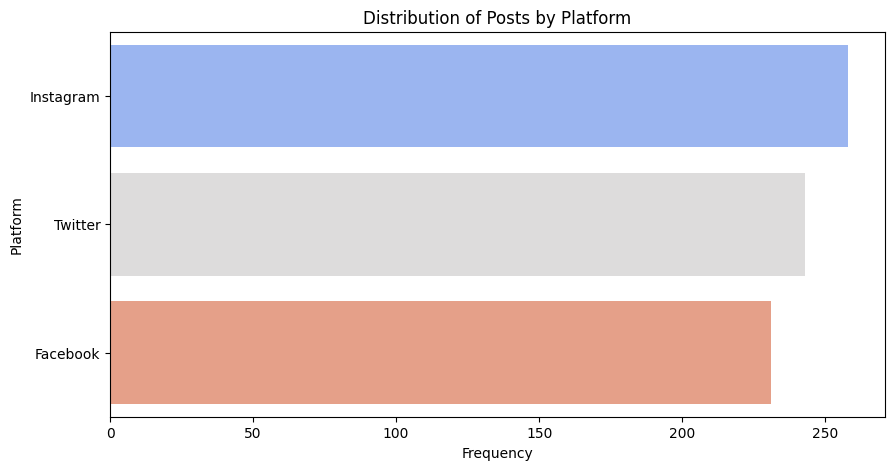

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns


df2 = df.dropna(subset=["Platform"])


plt.figure(figsize=(10,5))
sns.countplot(y=df2['Platform'], order=df2['Platform'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Posts by Platform")
plt.xlabel("Frequency")
plt.ylabel("Platform")
plt.show()


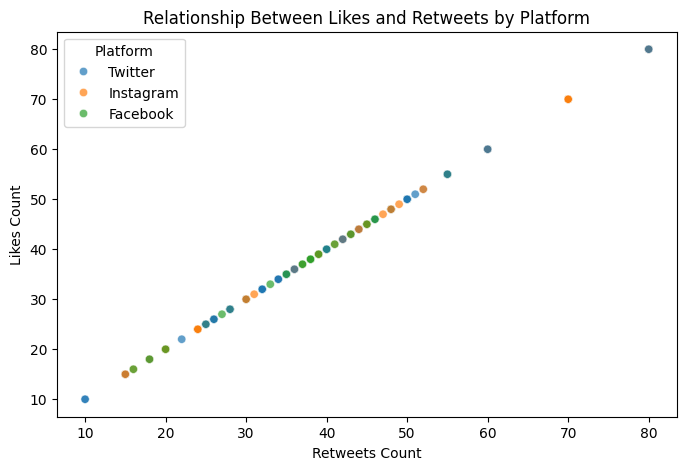

In [274]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df2['Retweets'], y=df['Likes'], hue=df2['Platform'], alpha=0.7)
plt.title("Relationship Between Likes and Retweets by Platform")
plt.xlabel("Retweets Count")
plt.ylabel("Likes Count")
plt.legend(title="Platform")
plt.show()


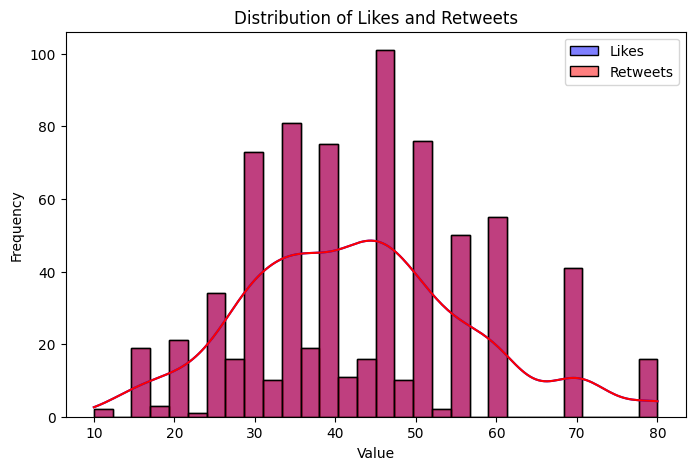

In [275]:
plt.figure(figsize=(8,5))
sns.histplot(df['Likes'], bins=30, kde=True, color='blue', label="Likes")
sns.histplot(df['Retweets'], bins=30, kde=True, color='red', label="Retweets")
plt.title("Distribution of Likes and Retweets")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


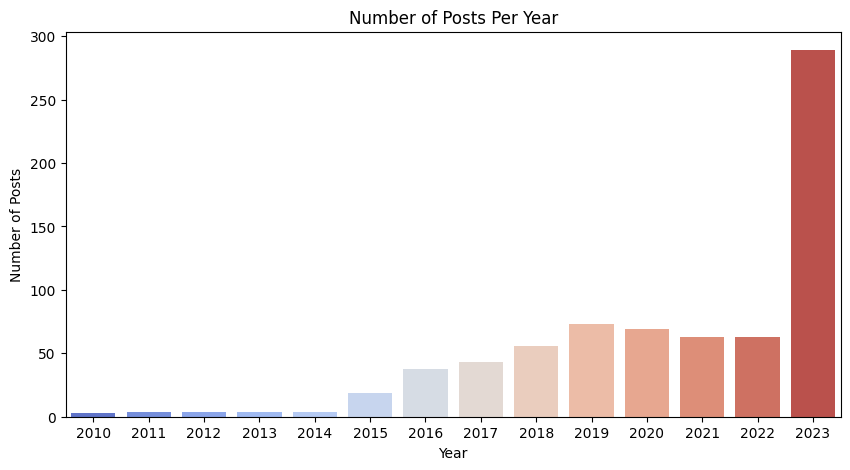

In [276]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Datetime'].dt.year, palette="coolwarm")
plt.title("Number of Posts Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.show()


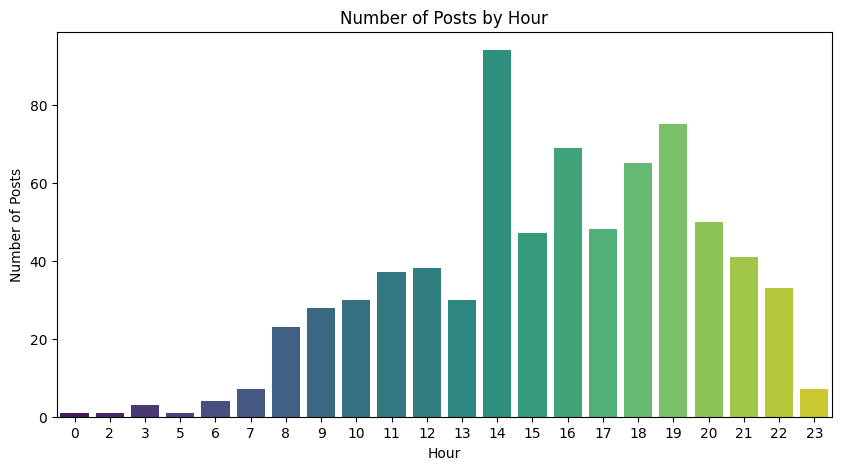

In [277]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Datetime'].dt.hour, palette="viridis")
plt.title("Number of Posts by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Posts")
plt.show()


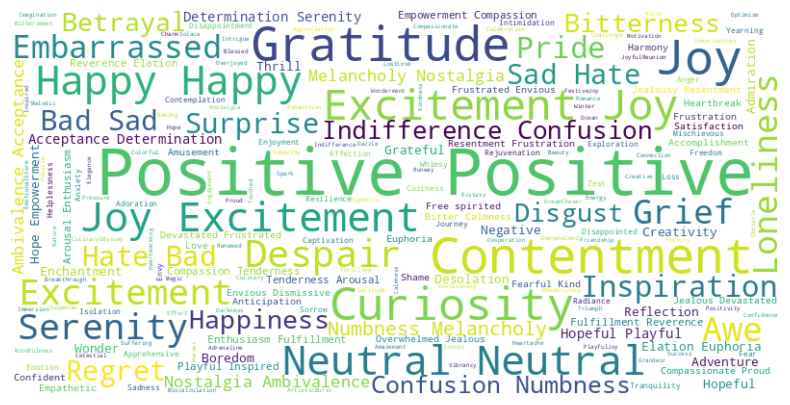

In [278]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the DataFrame contains the 'Sentiment' column
if 'Sentiment' in df.columns:
    # Convert the 'Sentiment' column to a list
    unique_sentiments = df['Sentiment'].tolist()

    # Generate the word cloud
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(unique_sentiments))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("The column 'Sentiment' does not exist in the DataFrame.")

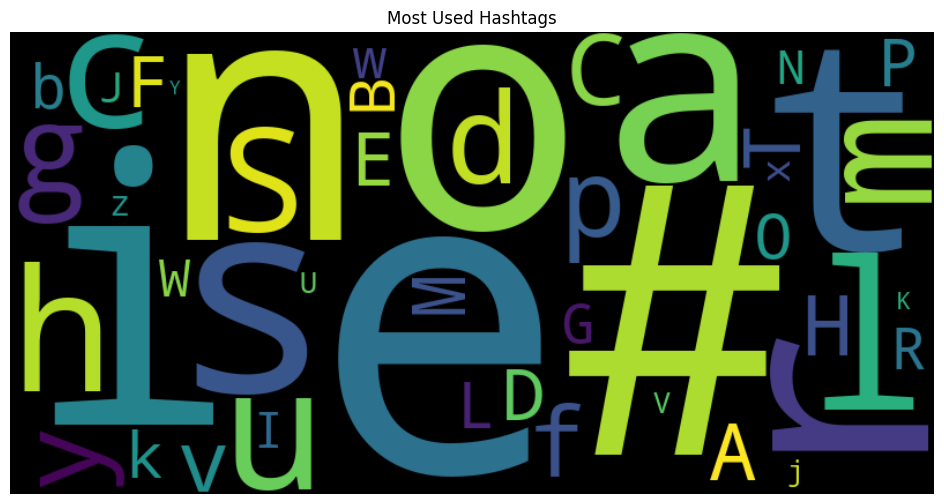

In [279]:
from collections import Counter
from wordcloud import WordCloud

hashtags = [tag for sublist in df2['Hashtags'].dropna() for tag in sublist]
hashtags_counts = Counter(hashtags)
hashtags_common = dict(hashtags_counts.most_common(50))

plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(hashtags_common)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Used Hashtags")
plt.show()


In [280]:
import plotly.express as px  # Import plotly.express
df2['temp_list'] = df2['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df2['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [281]:
# Function to create a word cloud for a specific sentiment
def create_word_cloud(df, sentiment, color_scale, title):
    # Filter texts based on sentiment
    sentiment_texts = df[df['Sentiment'] == sentiment]['Clean_Text']
    sentiment_words = [word for text in sentiment_texts for word in text.split()]
    top_words = Counter(sentiment_words).most_common(10)

    # Convert results to a list of dictionaries
    top_data = [{'Common_words': word, 'Frequency': count} for word, count in top_words]

    # Create an interactive visualization using plotly
    fig = px.bar(top_data,
                 x='Frequency',
                 y='Common_words',
                 title=f'Top 10 Common Words in {sentiment} Sentiment',
                 labels={'Frequency': 'Frequency', 'Common_words': 'Words'},
                 orientation='h',
                 color='Frequency',
                 color_continuous_scale=color_scale)

    # Display the visualization
    fig.show()

# Create word clouds for each sentiment
create_word_cloud(df2, 'Positive', 'Teal', 'Positive Sentiment')
create_word_cloud(df2, 'Neutral', 'Purples', 'Neutral Sentiment')
create_word_cloud(df2, 'Negative', 'Reds', 'Negative Sentiment')

📌 Splitting Data 🔄📊

In [283]:
df2 = df. copy()

In [284]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

In [314]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data Modling

LogisticRegression

In [334]:
from imblearn.over_sampling import RandomOverSampler
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Text'])
y = df2['Sentiment']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [335]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000, C=0.1)

LogisticRegression(C=0.1, max_iter=1000)

In [333]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)


model = LogisticRegression(max_iter=1000, C=0.1)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_tfidf)


from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9546247818499127
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       0.91      0.62      0.74        16
      Accomplishment       1.00      1.00      1.00         7
          Admiration       1.00      1.00      1.00         8
           Adoration       1.00      1.00      1.00        10
          Adrenaline       0.50      1.00      0.67         4
           Adventure       1.00      0.75      0.86         4
           Affection       0.92      1.00      0.96        12
           Amazement       1.00      1.00      1.00        13
         Ambivalence       1.00      1.00      1.00        10
           Amusement       1.00      1.00      1.00         9
               Anger       1.00      1.00      1.00         9
        Anticipation       0.86      1.00      0.92        12
             Anxiety       0.80      1.00      0.89         4
        Appreciation       1.00      1.00      1.00        12
        Apprehen

In [336]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_test_tfidf)


print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      0.62      0.77        16
      Accomplishment       1.00      1.00      1.00         7
          Admiration       1.00      1.00      1.00         8
           Adoration       1.00      1.00      1.00        10
          Adrenaline       0.50      1.00      0.67         4
           Adventure       1.00      0.75      0.86         4
           Affection       0.92      1.00      0.96        12
           Amazement       1.00      1.00      1.00        13
         Ambivalence       1.00      1.00      1.00        10
           Amusement       1.00      1.00      1.00         9
               Anger       1.00      1.00      1.00         9
        Anticipation       1.00      1.00      1.00        12
             Anxiety       0.80      1.00      0.89         4
        Appreciation       1.00      1.00      1.00        12
        Apprehensive       1.00      1.00    